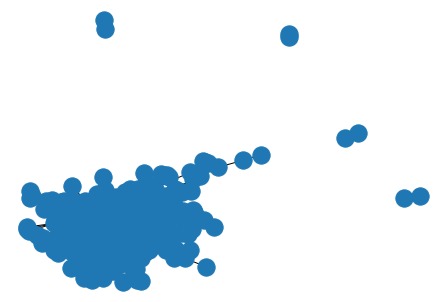

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import csv
from csv import reader

row_count = 511
edge=[]

with open('final.csv') as f:
    reader = csv.reader(f, delimiter = ' ')
    for x in range(row_count):
        row = next(reader, None)
        row_length = len(row)
        for y in range(1,row_length):
            edge.append(((x+1),int(row[y])))
     
    G = nx.Graph()
    G.add_edges_from(edge)
    nx.draw(G)
    


In [2]:
#nx.closeness_centrality(G)
#len(between_centrality_dict)

In [3]:
import csv

from csv import reader

names_dictionary = {}
with open ("Raw_Data.csv", 'r') as f:
    reader = csv.reader(f, delimiter = ' ')
    first_line = next(reader, None)

    if first_line:
        row_count = int(first_line[0])


        for index in range(row_count):
            line1 = next(reader, None)
            serial_no = int(line1[0])
            name = line1[3:5]

            names_dictionary_temp = {serial_no: name}
            names_dictionary.update(names_dictionary_temp)
            line2 = next(reader, None)
        

In [4]:
nx.average_clustering(G)

0.28203036561782574

In [5]:
adj_matrix = nx.adjacency_matrix(G)
adj_matrix.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
adj_matrix.shape

(474, 474)

In [7]:
nx.transitivity(G)

0.21812899966318625

In [8]:
node_list = []
for x in range(len(edge)):
    node_list.append(edge[x][0])

In [10]:
node_list
unique_nodes = list(set(node_list))
#unique_nodes


In [39]:
degCent = nx.degree_centrality(G)
closeCent = nx.closeness_centrality(G, wf_improved =False)
closeCent = nx.closeness_centrality(G, wf_improved =True)
betwCent = nx.betweenness_centrality(G, k = None)

In [12]:
node_list = []

for x in range(len(edge)):
    node_list.append(edge[x][0])
    
unique_nodes = list(set(node_list)) 

degCent = nx.degree_centrality(G)
degree_centrality_list = []
degree_centrality_dict = {}

closeCent = nx.closeness_centrality(G, wf_improved =True)
closeness_centrality_list = []
closeness_centrality_dict = {}

betwCent = nx.betweenness_centrality(G, k = None)
between_centrality_list = []
between_centrality_dict = {}

clustering_coefficient_list = []
clustering_coefficient_dict = {}



for x in range(len(unique_nodes)):
    
    degree_centrality_list.append(degCent[unique_nodes[x]])
    degree_centrality_dict[unique_nodes[x]] = degree_centrality_list[x]
    
    closeness_centrality_list.append(closeCent[unique_nodes[x]]) 
    closeness_centrality_dict[unique_nodes[x]] = closeness_centrality_list[x]

    between_centrality_list.append(betwCent[unique_nodes[x]])
    between_centrality_dict[unique_nodes[x]] = between_centrality_list[x]    
    
    clustering_coefficient_list.append(nx.clustering(G,unique_nodes[x]))
    clustering_coefficient_dict[unique_nodes[x]] = clustering_coefficient_list[x]

In [14]:
degree_centrality_dict = nx.degree_centrality(G)
between_centrality_dict = nx.betweenness_centrality(G)
closeness_centrality_dict = nx.closeness_centrality(G)

unique_nodes = list(degree_centrality_dict.keys())

for x in range(len(unique_nodes)):
    
    degree_centrality_list.append(degree_centrality_dict[unique_nodes[x]])  
    closeness_centrality_list.append(closeness_centrality_dict[unique_nodes[x]]) 
    between_centrality_list.append(between_centrality_dict[unique_nodes[x]])

<AxesSubplot:xlabel='Degree centrality'>

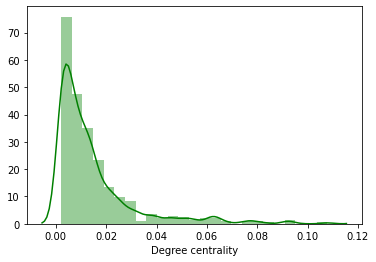

In [15]:
import seaborn as sns
sns.distplot(degree_centrality_list, bins = 25, color = 'g', axlabel = "Degree centrality")

<AxesSubplot:xlabel='Closeness centrality'>

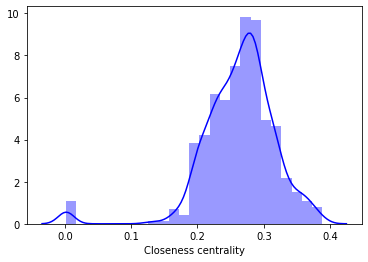

In [16]:
import seaborn as sns
sns.distplot(closeness_centrality_list, bins = 25, color = 'b', axlabel = "Closeness centrality")

<AxesSubplot:xlabel='Betweenness Centrality'>

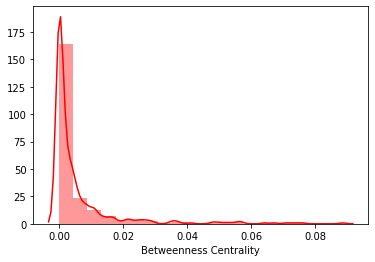

In [17]:
import seaborn as sns
sns.distplot(between_centrality_list, bins = 20, color = 'r', axlabel = "Betweenness Centrality")

In [40]:
from collections import Counter

k = Counter(degree_centrality_dict) 
high_degree = k.most_common(10) 

l = Counter(between_centrality_dict)
high_between = l.most_common(10)

m = Counter(closeness_centrality_dict)
high_closeness = m.most_common(10)

def Convert(tup, di): 
    di = dict(tup) 
    return di 
      
temp_dict_degree = {} 
top_ten_degree_centrality_dictionary = Convert(high_degree, temp_dict_degree)

keys_one = set(top_ten_degree_centrality_dictionary.keys())
keys_two = set(names_dictionary.keys())
same_keys = keys_one.intersection(keys_two)
result_degree = list(same_keys)

temp_dict_between = {}
top_ten_between_centrality_dictionary = Convert(high_between, temp_dict_between)

keys_one = set(top_ten_between_centrality_dictionary.keys())
keys_two = set(names_dictionary.keys())
same_keys = keys_one.intersection(keys_two)
result_between = list(same_keys)

temp_dict_closeness = {}
top_ten_closeness_centrality_dictionary = Convert(high_closeness, temp_dict_closeness)

keys_one = set(top_ten_closeness_centrality_dictionary.keys())
keys_two = set(names_dictionary.keys())
same_keys = keys_one.intersection(keys_two)
result_closeness = list(same_keys)

degree_centrality_top_ten = []
between_centrality_top_ten = []
closeness_centrality_top_ten = []


for x in result_degree:
    degree_centrality_top_ten.append((names_dictionary[x],top_ten_degree_centrality_dictionary[x]))
    
for x in result_between:
    between_centrality_top_ten.append((names_dictionary[x], top_ten_between_centrality_dictionary[x]))

for x in result_closeness:
    closeness_centrality_top_ten.append((names_dictionary[x], top_ten_closeness_centrality_dictionary[x]))
        

In [41]:
deg = sorted(degree_centrality_top_ten, key = lambda tup:tup[1], reverse=True)
bet = sorted(between_centrality_top_ten, key = lambda tup:tup[1], reverse=True)
clo = sorted(closeness_centrality_top_ten, key = lambda tup:tup[1], reverse = True)

In [42]:
deg_normal = []
for i in range(len(deg)):
    sn = deg[i][0][0]
    fn = deg[i][0][1]
    sc = deg[i][1]
    deg_normal.append((fn,sn,sc))

bet_normal = []
for i in range(len(bet)):
    sn = bet[i][0][0]
    fn = bet[i][0][1]
    sc = bet[i][1]
    bet_normal.append((fn,sn,sc))
    
clo_normal = []
for i in range(len(clo)):
    sn = clo[i][0][0]
    fn = clo[i][0][1]
    sc = clo[i][1]
    clo_normal.append((fn,sn,sc))    

In [43]:
import pandas as pd
from pandas import DataFrame

df_deg = DataFrame(deg_normal,columns = ['First Name','Surname','Degree Cent']).set_index(pd.Index(list(range(1,11))))
df_bet = DataFrame(bet_normal,columns = ['First Name','Surname','Between Cent']).set_index(pd.Index(list(range(1,11))))
df_col = DataFrame(clo_normal,columns = ['First Name','Surname','Close Cent']).set_index(pd.Index(list(range(1,11))))

In [44]:
df_col

,First Name,Surname,Close Cent
1,NOGA,"ALON,",0.388061
2,RONALD,"GRAHAM,",0.386094
3,ZOLTAN,"FUREDI,",0.379996
4,BELA,"BOLLOBAS,",0.375316
5,VERA,"SOS,",0.375008
6,VOJTECH,"RODL,",0.374088
7,ZSOLT,"TUZA,",0.369851
8,LASZLO,"LOVASZ,",0.369253
9,JOEL,"SPENCER,",0.368955
10,ERNST,"STRAUS,",0.362518


In [45]:
df_col

,First Name,Surname,Close Cent
1,NOGA,"ALON,",0.388061
2,RONALD,"GRAHAM,",0.386094
3,ZOLTAN,"FUREDI,",0.379996
4,BELA,"BOLLOBAS,",0.375316
5,VERA,"SOS,",0.375008
6,VOJTECH,"RODL,",0.374088
7,ZSOLT,"TUZA,",0.369851
8,LASZLO,"LOVASZ,",0.369253
9,JOEL,"SPENCER,",0.368955
10,ERNST,"STRAUS,",0.362518


In [47]:
df_bet

,First Name,Surname,Between Cent
1,FRANK*,"HARARY,",0.088450
2,VERA,"SOS,",0.075845
3,ERNST,"STRAUS,",0.073443
4,CARL,"POMERANCE,",0.070884
5,NOGA,"ALON,",0.067121
6,RONALD,"GRAHAM,",0.064127
7,LEE,"RUBEL,",0.057053
8,HARRY,"POLLARD,",0.056283
9,JANOS,"PACH,",0.055706
10,ANDRAS,"HAJNAL,",0.053643


In [52]:
degree_centrality_dict = nx.degree_centrality(G)
between_centrality_dict = nx.betweenness_centrality(G)
closeness_centrality_dict = nx.closeness_centrality(G)

<AxesSubplot:>

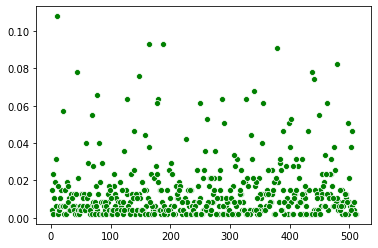

In [53]:
import seaborn as sns

sns.scatterplot(list(degree_centrality_dict.keys()), list(degree_centrality_dict.values()), color = 'green')

<AxesSubplot:>

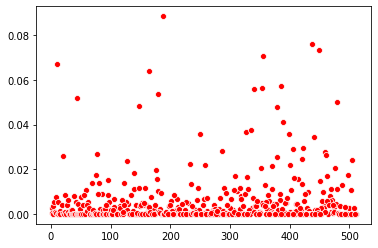

In [54]:
import seaborn as sns

sns.scatterplot(list(between_centrality_dict.keys()), list(between_centrality_dict.values()), color = 'red')

<AxesSubplot:>

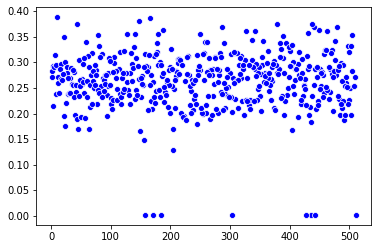

In [55]:
import seaborn as sns

sns.scatterplot(list(closeness_centrality_dict.keys()), list(closeness_centrality_dict.values()), color = 'blue')